<a href="https://colab.research.google.com/github/capybabruh/FruitImageProcessing/blob/main/ModelTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading model

In [ ]:
cnn = tf.keras.models.load_model('/content/sample_data/trained_model.h5')

#Perform prediction on single image


In [ ]:
import cv2
image_path = "/content/drive/MyDrive/archive/test/bell pepper/Image_1.jpg"
image = cv2.imread(image_path)




Text(0.5, 1.0, 'Test on single image')

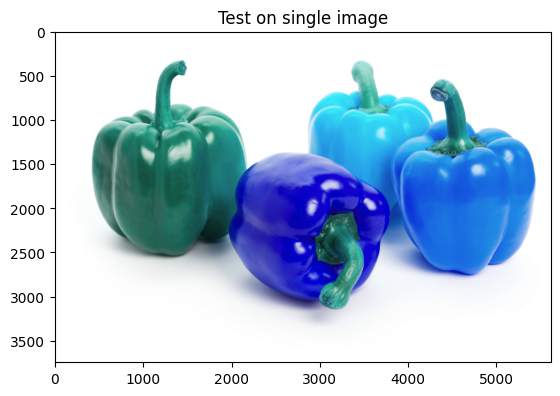

In [ ]:
plt.imshow(image)
plt.title('Test on single image')

#Testing model

In [ ]:
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr =tf.keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
print(predictions[0])

[2.6947066e-14 4.5496422e-15 5.1511649e-11 9.9999964e-01 7.2141921e-24
 1.3756501e-13 6.9088191e-10 2.1999979e-21 9.1213703e-12 9.3486899e-16
 9.2795975e-28 2.1488081e-26 8.3401028e-20 4.8601327e-15 4.6185853e-18
 4.6289272e-23 5.6374655e-15 2.4719230e-19 2.0921715e-19 4.8253608e-17
 1.3421581e-11 1.2380787e-13 2.9342826e-12 6.2316722e-19 2.6784214e-18
 3.9323696e-17 3.1803346e-14 1.9356893e-14 8.2870802e-12 1.0287684e-14
 1.0347741e-15 4.4929213e-13 2.8259240e-07 2.2485958e-08 1.5081992e-20
 1.5321138e-12]


In [ ]:
test_set= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)


Found 359 files belonging to 36 classes.


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index)

(array([3]),)


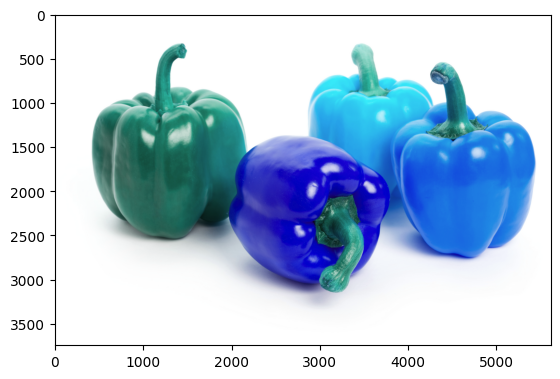

In [ ]:
plt.imshow(image)


In [ ]:
#Single prediction
print('it is a {} '.format(test_set.class_names[result_index[0][0]]))

it is a bell pepper 
